In [1]:
# Applied Machine Learning (HOUSECS 59-03)
# Fall 2018, Duke University
# Naive Bayes Classifiers

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

Let's begin by exploring a dataset that looks at irises, a type of flower: load the data into a Pandas dataframe. Take a look at the different features (sepal length, sepal width, petal length, and petal width) and classes (Setosa, Versicolour, and Virginica).

In [3]:
# load dataset
iris = datasets.load_iris()
print(iris["DESCR"])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["flower"] = iris.target
df = df.sample(frac=1).reset_index(drop=True) # shuffle rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,4.8,3.0,1.4,0.1,0
1,5.7,2.5,5.0,2.0,2
2,6.4,2.7,5.3,1.9,2
3,6.7,2.5,5.8,1.8,2
4,6.2,2.8,4.8,1.8,2


We can also visualize the data by plotting "clusters" of the same flower type over two features: in this case, sepal length and sepal width. Notice how flower 0 is nicely separated from the other two flowers based on these two features; however, the other two flowers are not separated just based on these two features.

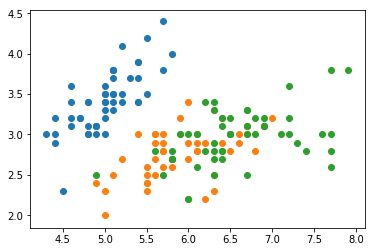

In [5]:
# plot clusters based on sepal length and sepal width
plt.scatter(df[df["flower"] == 0]["sepal length (cm)"], df[df["flower"] == 0]["sepal width (cm)"])
plt.scatter(df[df["flower"] == 1]["sepal length (cm)"], df[df["flower"] == 1]["sepal width (cm)"])
plt.scatter(df[df["flower"] == 2]["sepal length (cm)"], df[df["flower"] == 2]["sepal width (cm)"])

---
We can create a simple Naive Bayes classification model that takes all four features (sepal length, sepal width, petal length, and petal width) as input to predict the flower type (Setosa, Versicolour, or Virginica). We can use the first 120 points as training, and test on the remaining 30 (notice how we shuffled the data earlier). Also, recall that the features are *continuous*, and hence we must model them as such.

In [6]:
# create and fit model
gnb = GaussianNB()
gnb.fit(df.loc[:119, iris.feature_names], df.loc[:119, "flower"])

GaussianNB(priors=None)

In [7]:
# predict model
gnb_pred = gnb.predict(df.loc[120:, iris.feature_names])
print("accuracy", accuracy_score(df.loc[120:, "flower"], gnb_pred))
print("misclassification error", 1-accuracy_score(df.loc[120:, "flower"], gnb_pred))

accuracy 0.9
misclassification error 0.09999999999999998


From the testing set, we can calculate the accuracy and misclassification error. We can also compute a confusion matrix, which provides a concise presentation of the predictive power of the model.

In [8]:
conf_matrix = confusion_matrix(df.loc[120:, "flower"], gnb_pred)
print("confusion matrix")
print(conf_matrix)

confusion matrix
[[ 8  0  0]
 [ 0  9  2]
 [ 0  1 10]]


Notice how the confusion matrix is now 3x3, as opposed to the 2x2 confusion matrix we looked at in a previous lecture. With a neighbor, discuss why this is the case, and interpret the values in the matrix. Note that the rows signify the *true* labels, and the columns signify the *predicted* labels. Which flowers do we predict well, and which do we not? Taking a look at the plot(s) we produced earlier, why might this be the case?

One last thing to note: precision and recall, in the multiclassification case, are defined in a one-vs-all manner. We can think of them being defined over each class in a binary fashion (correct or incorrect): did we predict the class (correctly) or not (incorrectly)? Take some time to determine the precision and recall of the model for each class.